<a href="https://colab.research.google.com/github/khuongduying/dataviz/blob/main/DataViz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis (EDA)

EDA is an iterative cycle:
1. Generate questions about your data.
2. Search for answers by visualizing, transforming, and modelling your data.
3. Use what you learn to refine your questions and/or generate new questions.

### Prerequisites

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Questions

Ex:
1. What type of variation occurs within my variables?
2. What type of covariation occurs between my variables?

## Variation

Each of your measurements will include a small amount of error that varies from measurement to measurement.

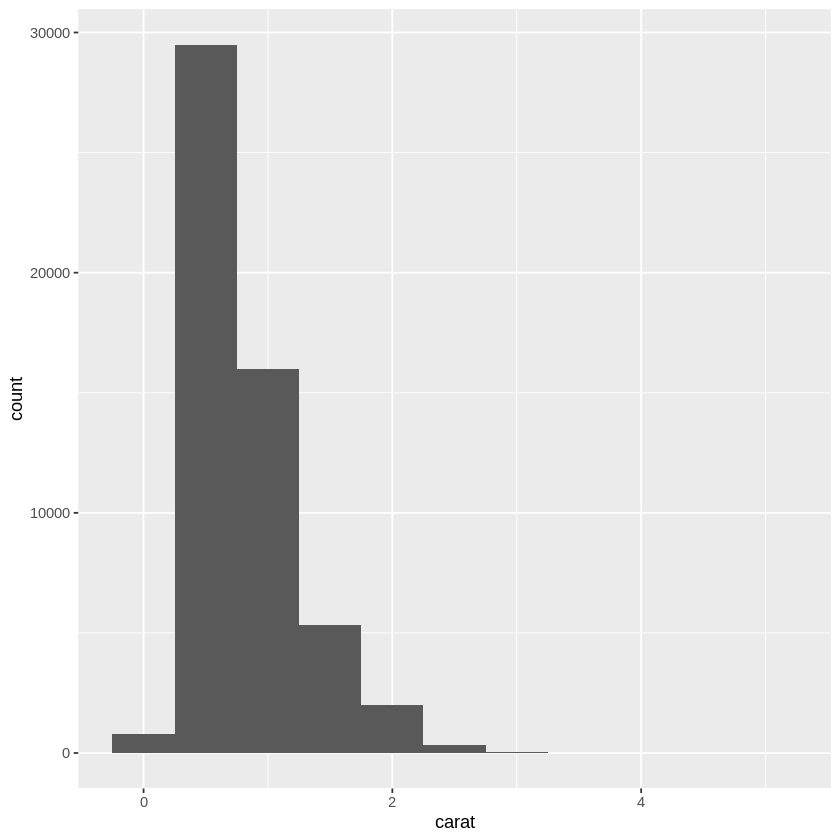

In [ ]:
ggplot(diamonds, aes(x=carat))+
  geom_histogram(binwidth=0.5)

What should you look for in your plots?

The key to asking good follow-up questions will be to rely on your curiosity (What do you want to learn more about?) as well as your skeptism (How could this be misleading?).

### Typical values

Places that do not have bars reveal values that were not seen in your data. To turn this information into useful question, look for nay unexpected:
- Which values are the most common? Why?
- Which values are rare? Why? Does that match your expectations?
- Can you see any unusual patterns? What might explain them?

In [ ]:
# Subset data
smaller <- diamonds |>
  filter(carat < 3)

In [ ]:
head(smaller)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


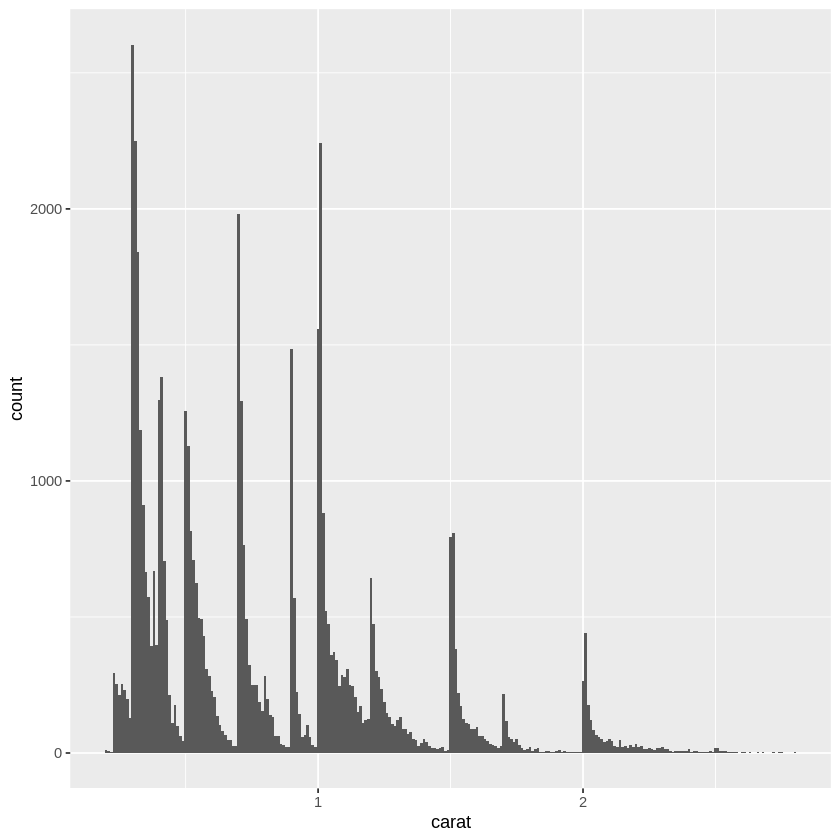

In [ ]:
ggplot(smaller, aes(x=carat)) +
  geom_histogram(binwidth=0.01)

This histogram suggests several intersting questions:
- Why are there more diamonds at whole carats and common fraction of carats?
- Why are there more diamonds slightly to the right of each peak than there are slightly to the left of each peak?

Visualizations can also reveal clusters, which suggest that subgroups exist in your data. To understand the subgroups, ask:
- How are the observations within each subgroup similar to each other?
- How are the observations in separate clusters different from each other?
- How can you explain or describe the clusters?
- Why might the appearance of clusters be misleading?

>Some of these questions can be answered with the data while some will require domain expertise about the data.

Many of them will prompt you to explore a relationship between variables.

### Unusual values

Outliers are observations that are unusual; data points that don't seem to fit the pattern.

Sometimes outliers are data entry errors, sometimes theyare simply values at the extremes that happened to be observed in this data collection, and other times they suggest important new discoveries.

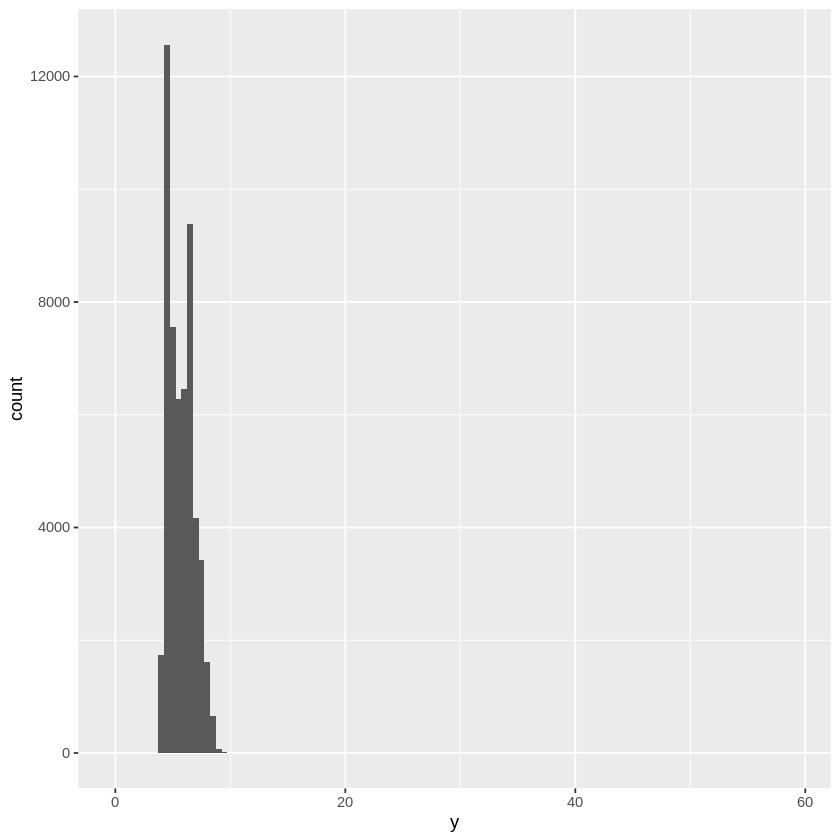

In [ ]:
ggplot(diamonds, aes(x = y)) +
  geom_histogram(binwidth = 0.5)

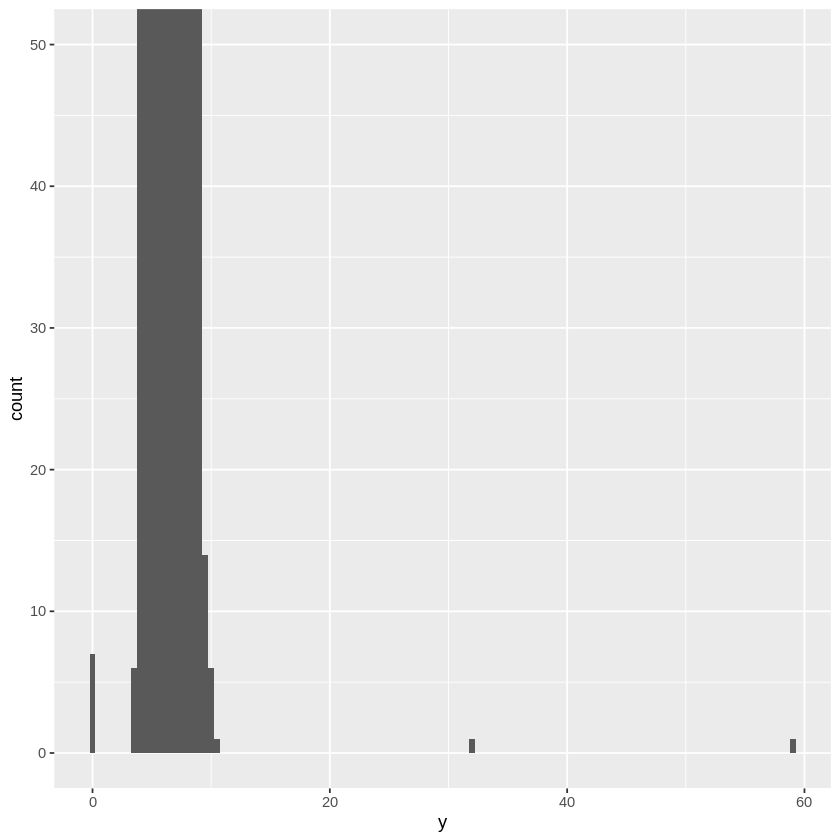

In [ ]:
ggplot(diamonds, aes(x=y)) +
  geom_histogram(binwidth=0.5)+
  coord_cartesian(ylim=c(0,50))

This allows us to see that there are three unusual values: 0, ~30, and ~60. We pluck them out with dplyr:

In [ ]:
unusual <- diamonds |>
  filter(y < 3 | y > 20) |>
  select(price, x, y, z) |>
  arrange(y)

In [ ]:
unusual

price,x,y,z
<int>,<dbl>,<dbl>,<dbl>
5139,0.00,0.0,0.00
6381,0.00,0.0,0.00
12800,0.00,0.0,0.00
15686,0.00,0.0,0.00
18034,0.00,0.0,0.00
2130,0.00,0.0,0.00
2130,0.00,0.0,0.00
2075,5.15,31.8,5.12
12210,8.09,58.9,8.06


We know that diamonds can’t have a width of 0mm, so these values must be incorrect.

By doing EDA, we have discovered missing data that was coded as 0, which we never would have found by simply searching for NAs.

>Going forward we might choose to re-code these values as `NA`s in order to prevent misleading calculations.

We mightalso suspect that measurements of 32mm and 59mm are implausible: those diamonds are over an inch long, but don't cost hundreds of thousands of dollars!

>It's good practice to repeat your analysis with and without the outliers.
- If they have minimal effect on the results, and you can't figure out why they're there, it's reasonable to omit them, and move on.
- If they have a substantial effect on your results, you shouldn't drop them without justification. You'll need to figure out what caused them (e.g. data entry error) and disclose that you removed them in your write-up.

### Exercises

1. Explore the distribution of each of the x, y, and z variables in diamonds. What do you learn?

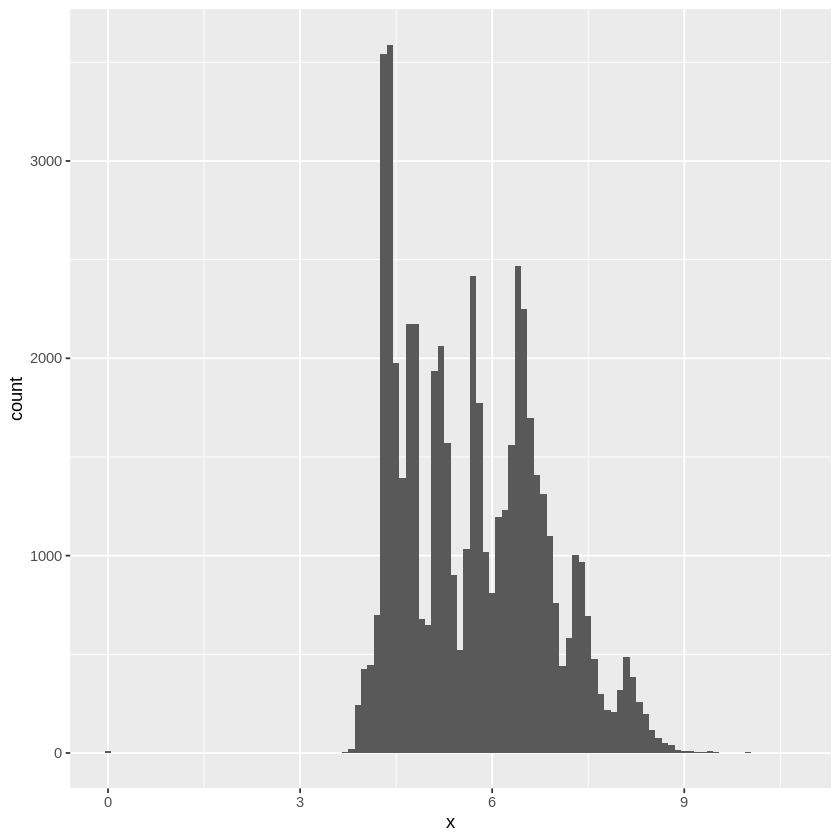

In [ ]:
ggplot(
  diamonds,
  aes(x=x)
)+
  geom_histogram(binwidth=0.1)

2. Explore the distribution of price.

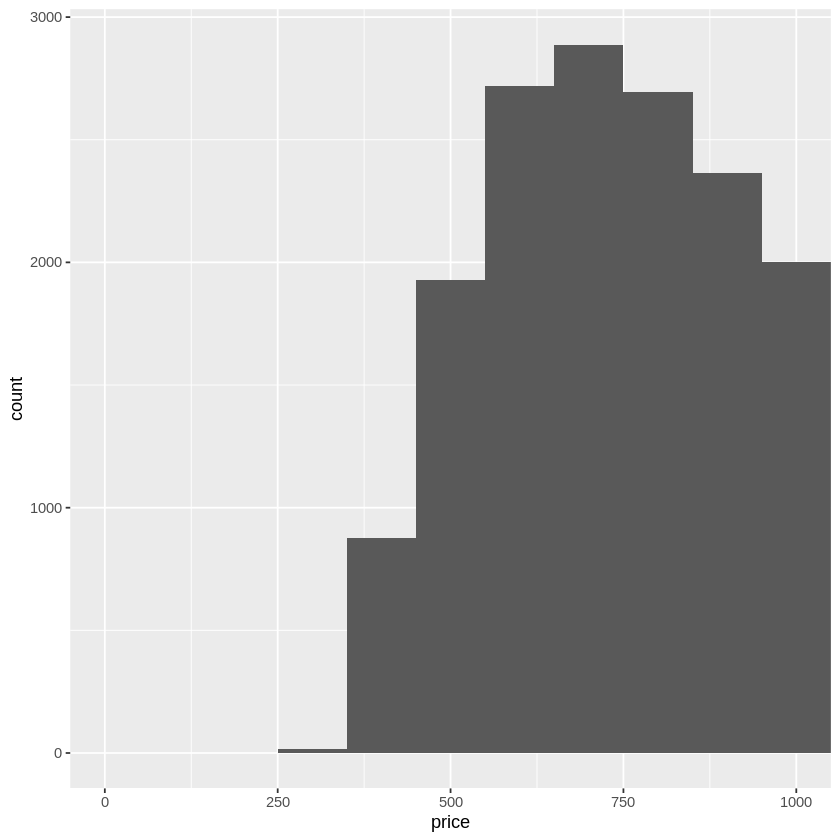

In [ ]:
ggplot(
  diamonds,
  aes(x=price)
)+
  geom_histogram(binwidth=100)+
  coord_cartesian(xlim=c(0,1000))

3. How many diamonds are 0.99 carat? How many are 1 carat? What do you think is the cause of the difference

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


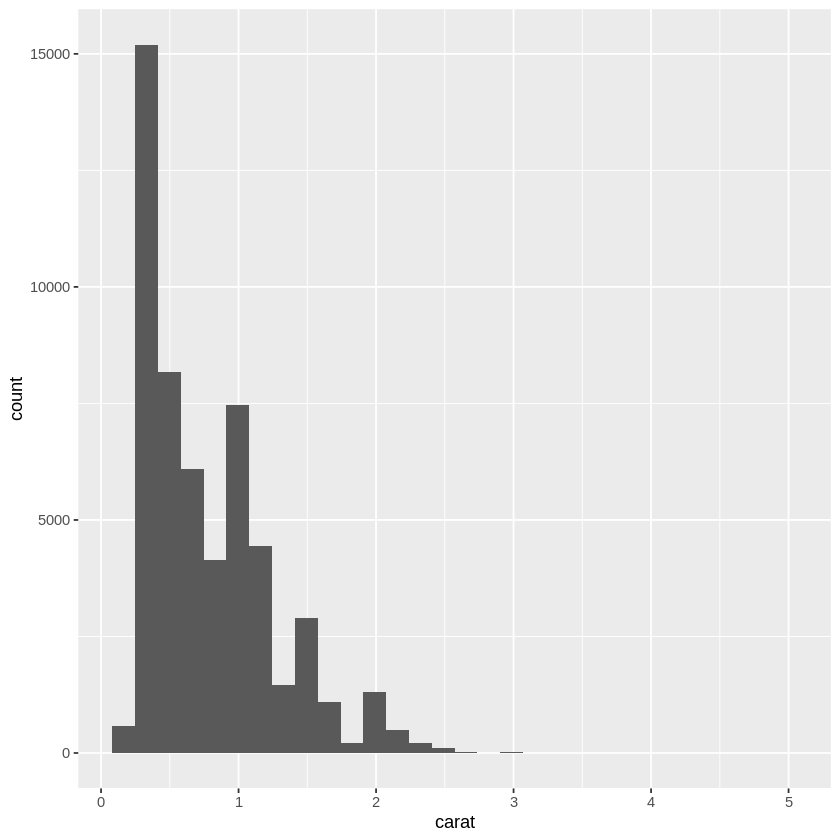

In [5]:
# Count 0.99 carat
ggplot(diamonds, aes(x=carat)) + geom_histogram()

In [39]:
# 0.99 carat diamonds
diamonds |> filter(carat == 0.99) |> count() |> as.numeric()

# 1 carat diamonds
diamonds |> filter(carat == 1) |> count() |> as.numeric()

[1] 23

[1] 1558

4. Compare and contrast coord_cartesian() vs. xlim() or ylim() when zooming in on a histogram. What happens if you leave binwidth unset? What happens if you try and zoom only half a bar shows?

## Unusual values

If you've encountered unusual values in your dataset, and simply want to move on to the rest of your analysis, you have two options.

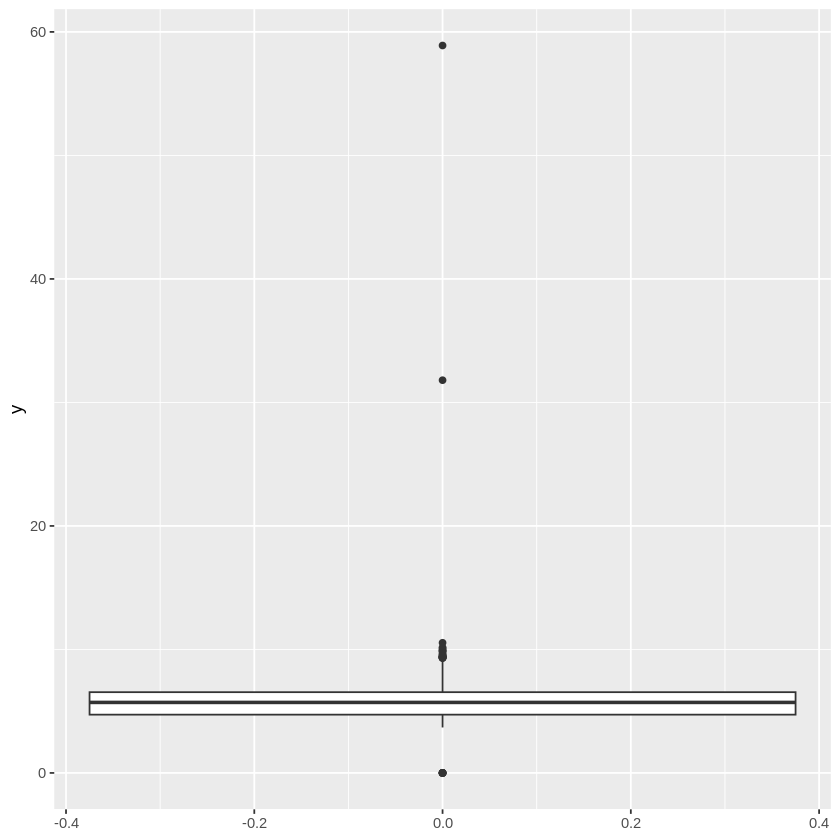

In [41]:
ggplot(
  diamonds,
  aes(y=y)
) + geom_boxplot()

1. Drop the entire row with the strange values (Don't recommended):

In [43]:
diamonds2 <- diamonds |>
  filter(between(y, 3, 20))

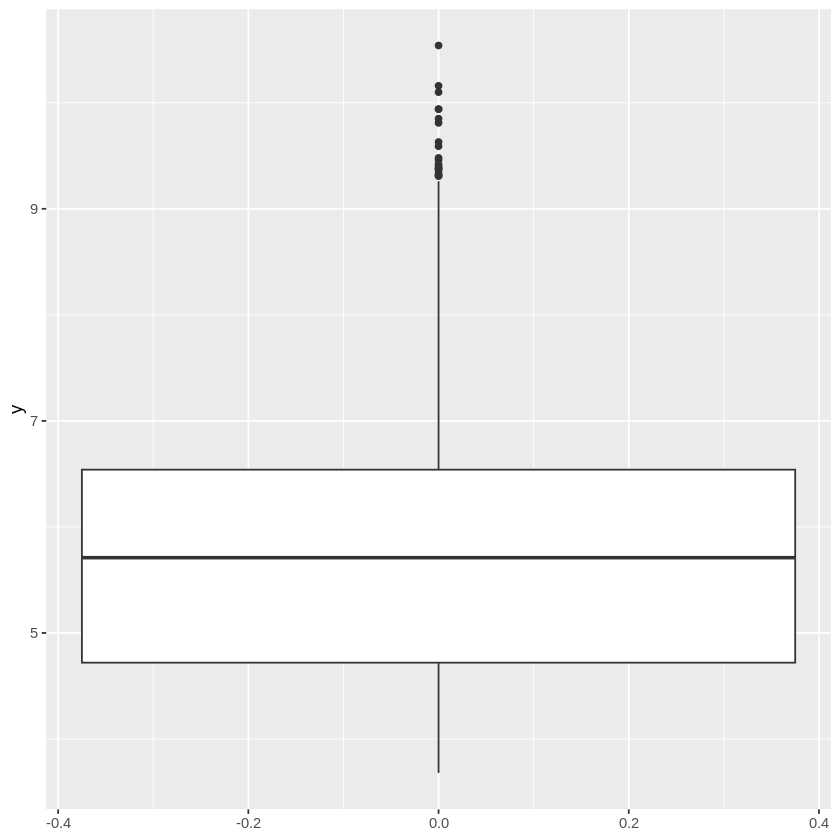

In [44]:
ggplot(
  diamonds2,
  aes(y=y)
) + geom_boxplot()

2. Replacing the unusual values with missing values (recommended)

Use mutate() to replace the variable with a modified copy. You can use the if_else() function to replace unusual values with NA

In [46]:
diamonds2 <- diamonds |>
  mutate(y = if_else(y<3 | y>20, NA, y))

Warning message:
“Removed 9 rows containing non-finite values (`stat_boxplot()`).”


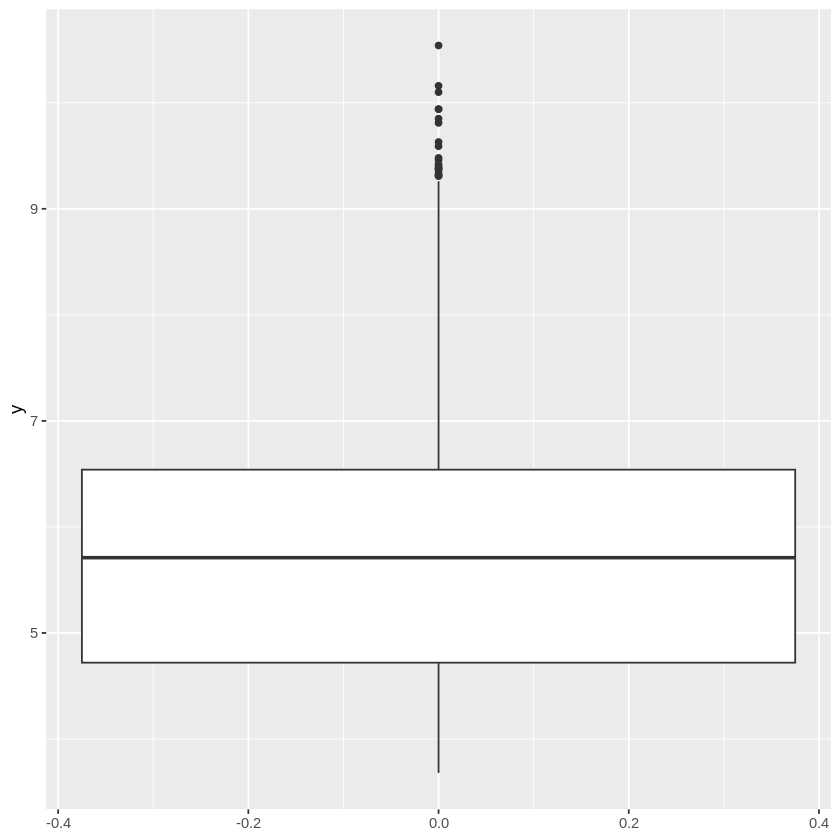

In [47]:
ggplot(
  diamonds2,
  aes(y=y)
) + geom_boxplot()

It's not obvious where you should plot missing values, so ggplot2 doesn't include them in the plot, but it does warn that they've been removed:

Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”


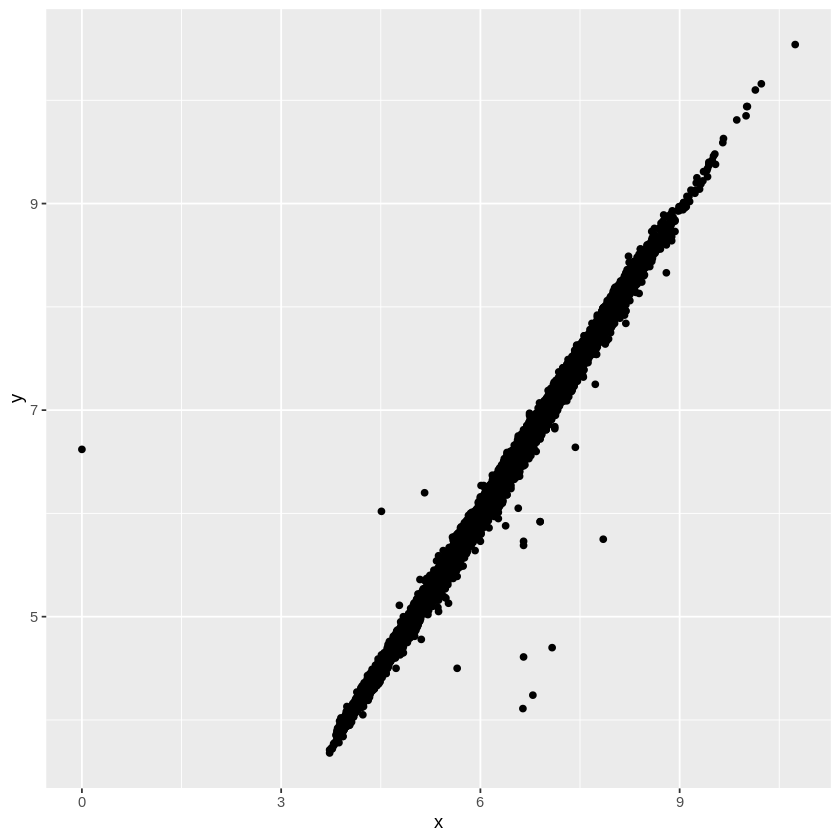

In [49]:
ggplot(diamonds2, aes(x=x, y=y)) +
  geom_point()

To suppress that warning, set na.rm = TRUE:

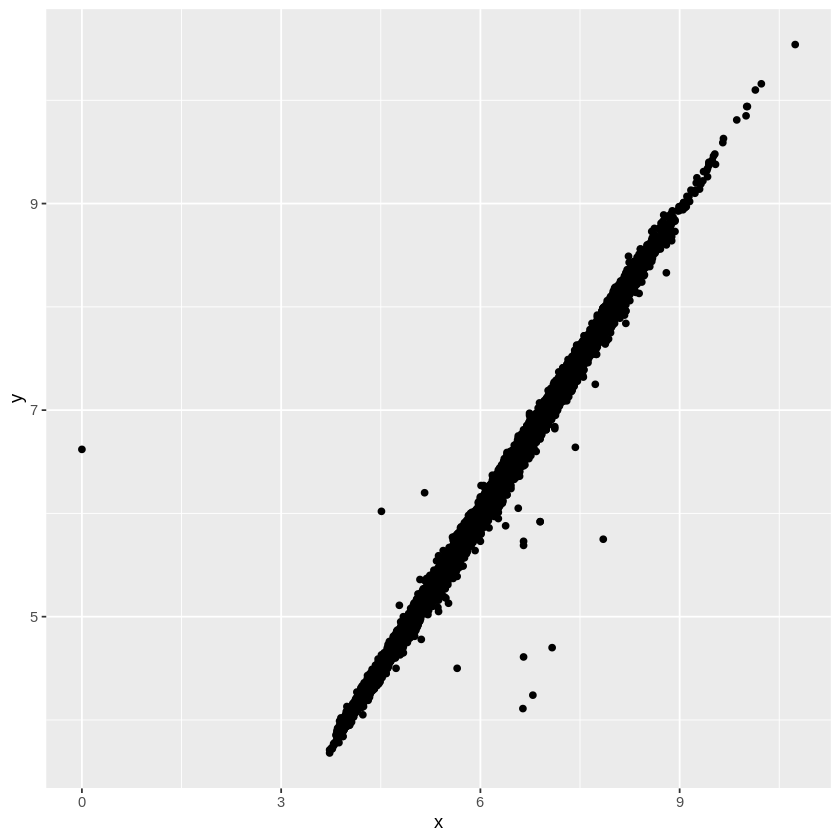

In [50]:
ggplot(diamonds2, aes(x=x, y=y))+
  geom_point(na.rm = TRUE)

In [54]:
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [56]:
library(nycflights13)

str(nycflights13::flights)

tibble [336,776 × 19] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int [1:336776] 515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : ch

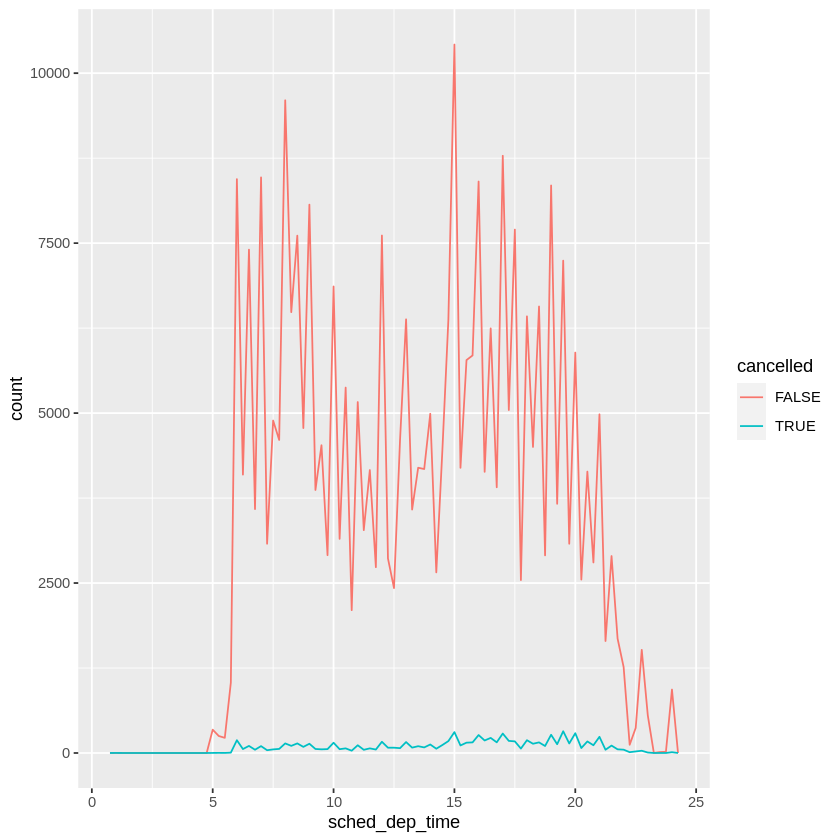

In [58]:
nycflights13::flights |>
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + (sched_min / 60)
  ) |>
  ggplot(aes(x = sched_dep_time)) +
  geom_freqpoly(aes(color = cancelled), binwidth = 1/4)

tibble [336,776 × 22] (S3: tbl_df/tbl/data.frame)
 $ year          : int [1:336776] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int [1:336776] 1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int [1:336776] 517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: num [1:336776] 5.25 5.48 5.67 5.75 6 ...
 $ dep_delay     : num [1:336776] 2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int [1:336776] 830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int [1:336776] 819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : num [1:336776] 11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr [1:336776] "UA" "UA" "AA" "B6" ...
 $ flight        : int [1:336776] 1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr [1:336776] "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr [1:336776] "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : chr [1:336776] "IAH"

In [57]:
?mutate()

### Exercises

1. What happens to missing values in a histogram?

What happens to missing values in a barchart?

Why is there a difference in how missing values are handled in histograms and bar charts?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 8255 rows containing non-finite values (`stat_bin()`).”


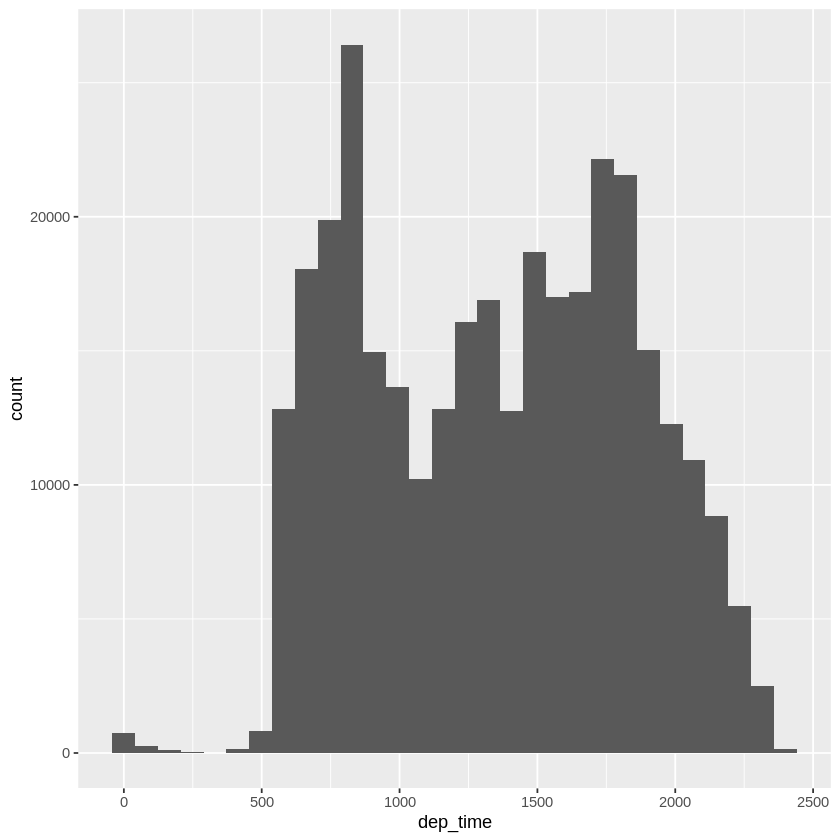

In [68]:
ggplot(flights, aes(x=dep_time)) +
  geom_histogram()

Warning message:
“Removed 8255 rows containing non-finite values (`stat_count()`).”


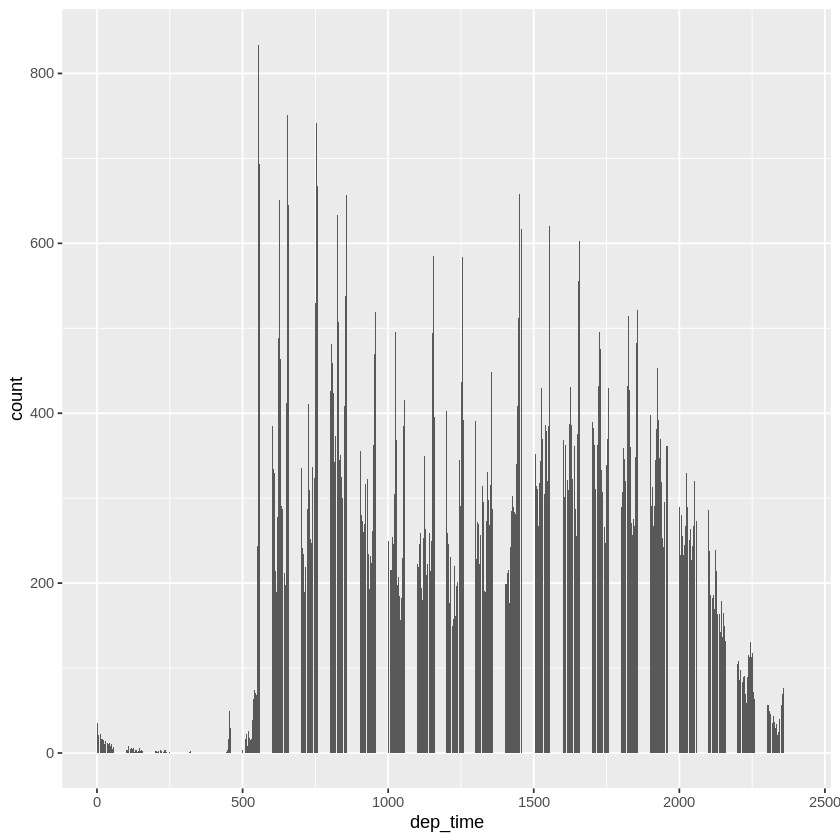

In [70]:
ggplot(flights, aes(x=dep_time)) +
  geom_bar()

2. What does na.rm = TRUE do in mean() and sum()?

In [83]:
mean(as.matrix(flights["dep_time"]))

[1] NA

In [81]:
mean(as.matrix(flights["dep_time"]), na.rm=TRUE)

[1] 1349.11

3. Recreate the frequency plot of scheduled_dep_time colored by whether the flight was cancelled or not. Also facet by the cancelled variable. Experiment with different values of the scales variable in the faceting function to mitigate the effect of more non-cancelled flights than cancelled flights.

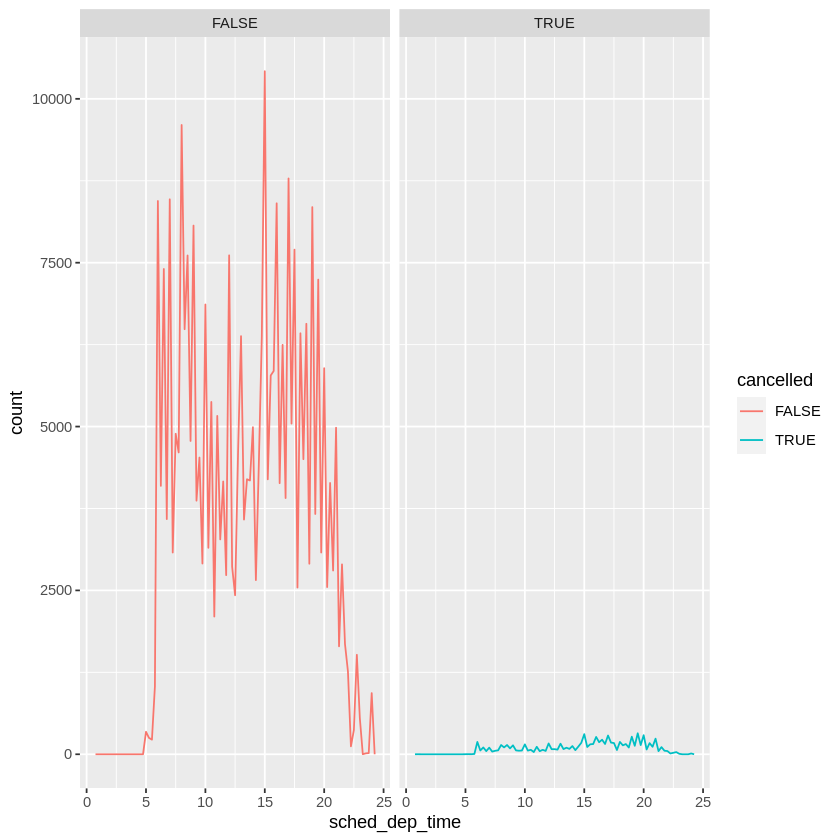

In [98]:
nycflights13::flights |>
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + (sched_min / 60)
  ) |>
  ggplot(aes(x = sched_dep_time)) +
  geom_freqpoly(aes(color = cancelled), binwidth = 1/4)+
  facet_wrap("cancelled")

## Covariation

If variation describes the behavior within a variable, covariation describes the behavior between variables.

Covariation is the tendency for the values of two or more variables to vary together in a related way. The best way to spot covariation is to visualize the relationship between two or more variables.

### A Categorical and a numerical variable

Let's explore how the price of a diamond varies with its quality (measured by cut) using geom_freqpoly():

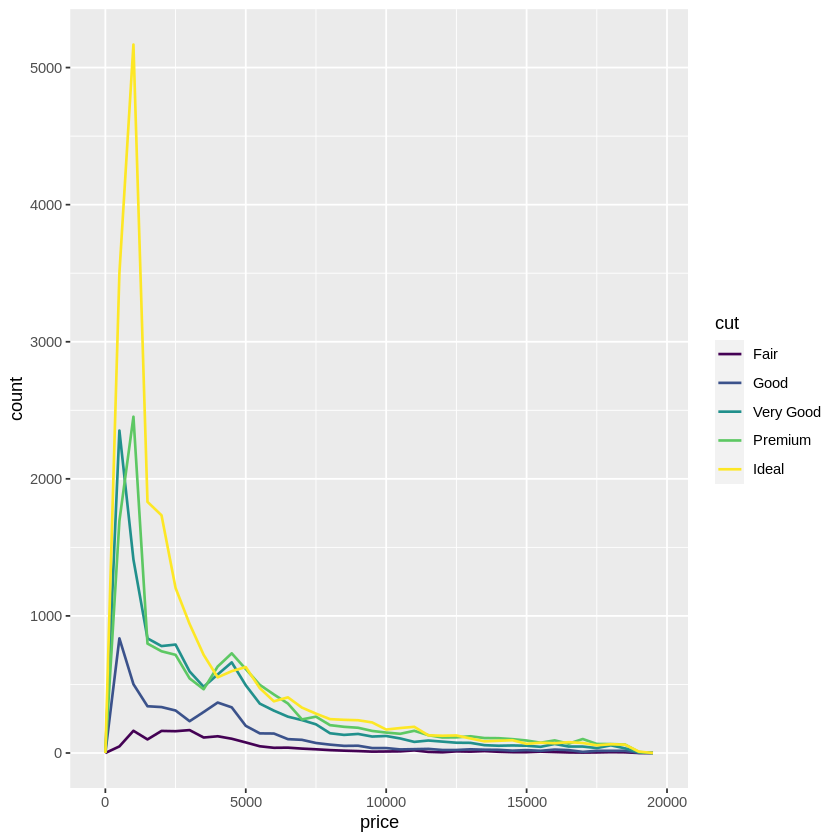

In [91]:
ggplot(diamonds, aes(x=price))+
  geom_freqpoly(aes(color=cut), binwidth=500, linewidth=0.75)

To make the comparison easier we need to swap that displayed on the y-axis.

Instead of displaying count, we'll display the density, which is the count standardized so that the area under each frequency polygon is one.

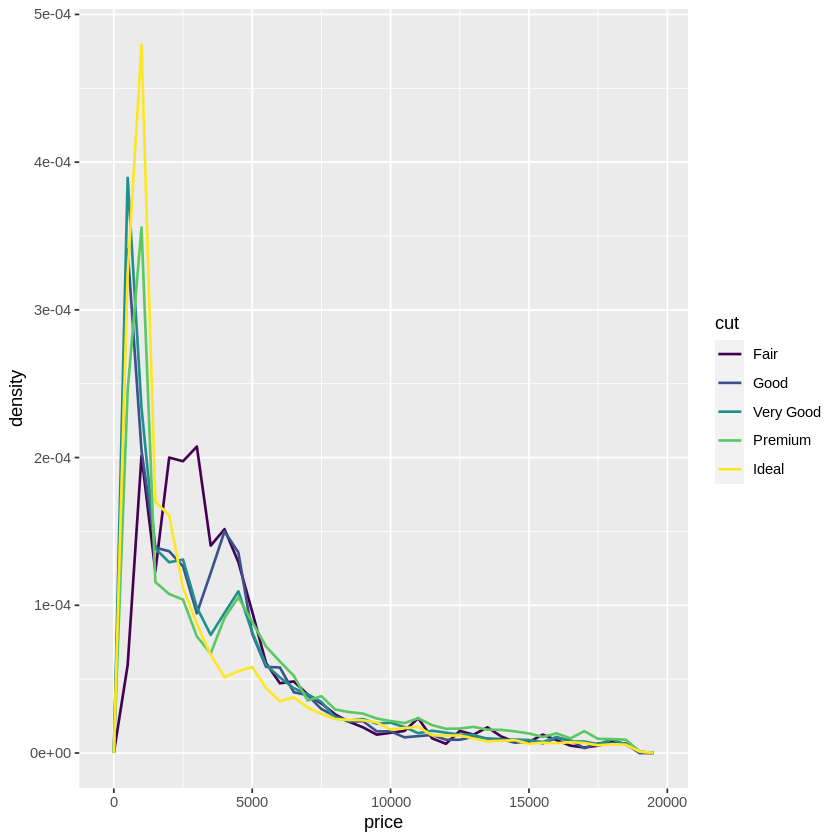

In [92]:
ggplot(diamonds, aes(x=price, y=after_stat(density)))+
  geom_freqpoly(aes(color=cut), binwidth=500, linewidth=0.75)

Note that we're mapping the density to y, but since density is not a variable in the diamonds dataset, we need to first calculate it. We use the after_stat() function to do so.

A visually simpler plot for exploring this relationship is using side-by-side boxplots.

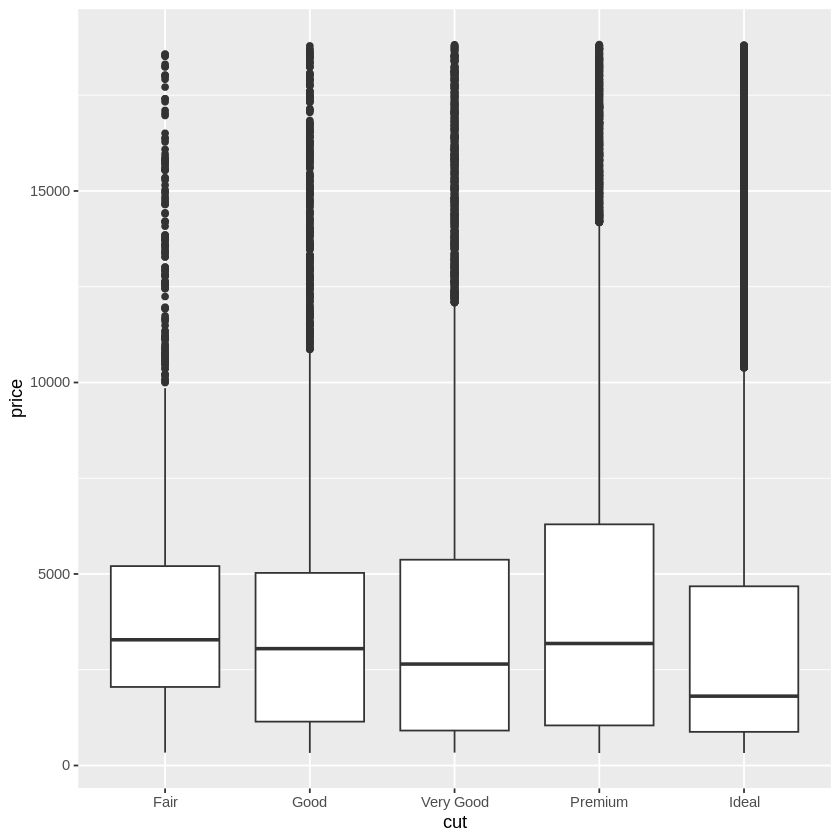

In [99]:
ggplot(diamonds, aes(x=cut, y=price))+
  geom_boxplot()

It supports the counter-intuitive finding that better quality diamonds are typically cheaper!